In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("Customer-Churn - Customer-Churn.csv")

In [3]:
df = df.dropna().reset_index(drop=True)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').astype(float)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No
7028,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
7029,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
7030,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No


# Análise da Taxa de Churn (Desistência)

Taxa de Churn Global: 26.58%

Taxa de Churn por Gênero:
gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64


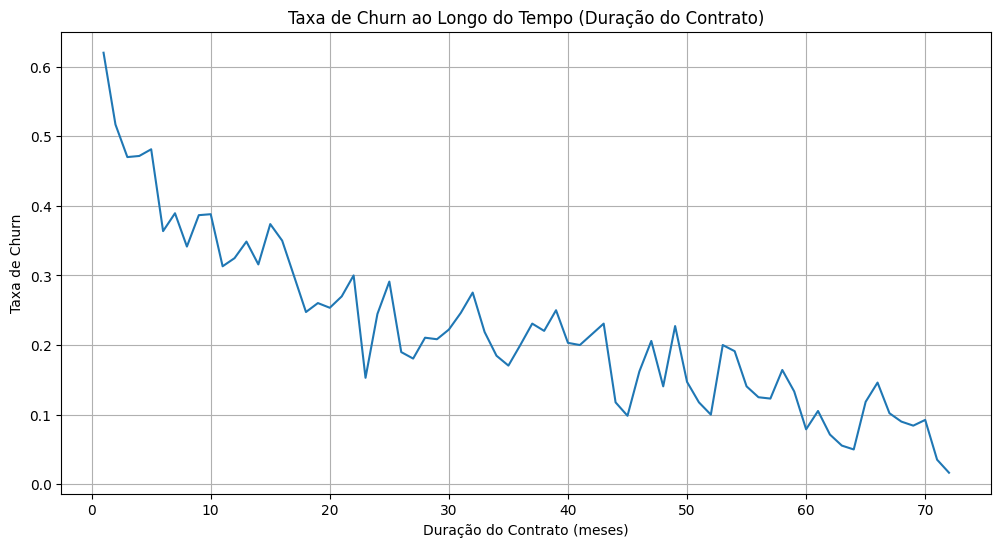

In [5]:
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

churn_rate_global = df['Churn'].mean()
print(f'Taxa de Churn Global: {churn_rate_global:.2%}')

churn_by_gender = df.groupby('gender')['Churn'].mean()
print('\nTaxa de Churn por Gênero:')
print(churn_by_gender)

churn_by_tenure = df.groupby('tenure')['Churn'].mean()
plt.figure(figsize=(12, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values)
plt.title('Taxa de Churn ao Longo do Tempo (Duração do Contrato)')
plt.xlabel('Duração do Contrato (meses)')
plt.ylabel('Taxa de Churn')
plt.grid(True)
plt.show()

# Análise da Duração do Contrato vs. Churn

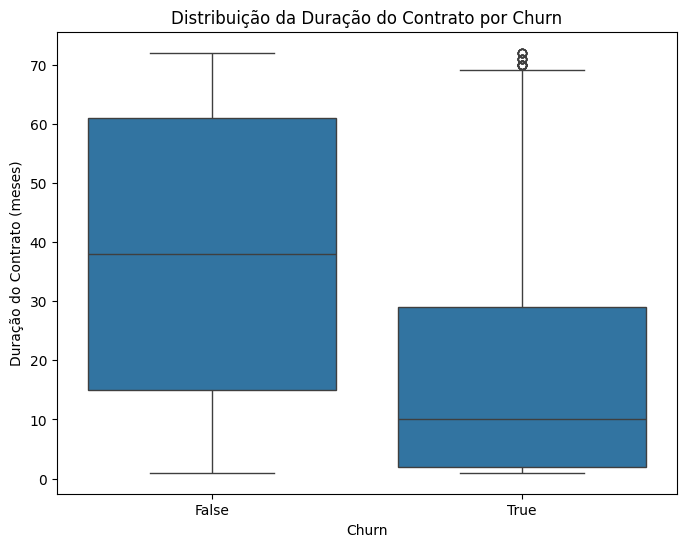


Média de Duração do Contrato por Churn:
Churn
False    37.650010
True     17.979133
Name: tenure, dtype: float64


In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Distribuição da Duração do Contrato por Churn')
plt.xlabel('Churn')
plt.ylabel('Duração do Contrato (meses)')
plt.show()

avg_tenure_by_churn = df.groupby('Churn')['tenure'].mean()
print('\nMédia de Duração do Contrato por Churn:')
print(avg_tenure_by_churn)


# Análise do Método de Pagamento vs. Churn


Proporção de Churn por Método de Pagamento:
PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64


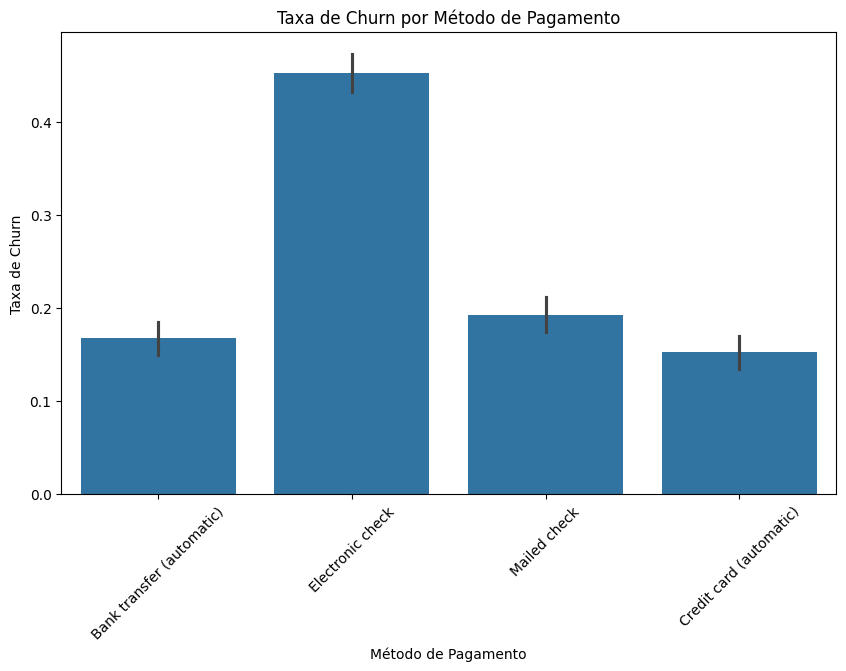

In [7]:
payment_churn_ratio = df.groupby('PaymentMethod')['Churn'].mean()
print('\nProporção de Churn por Método de Pagamento:')
print(payment_churn_ratio)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PaymentMethod', y='Churn')
plt.title('Taxa de Churn por Método de Pagamento')
plt.xticks(rotation=45)
plt.xlabel('Método de Pagamento')
plt.ylabel('Taxa de Churn')
plt.show()


# Análise da Idade (SeniorCitizen) vs. Churn


Taxa de Churn por Idade (SeniorCitizen):
SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64


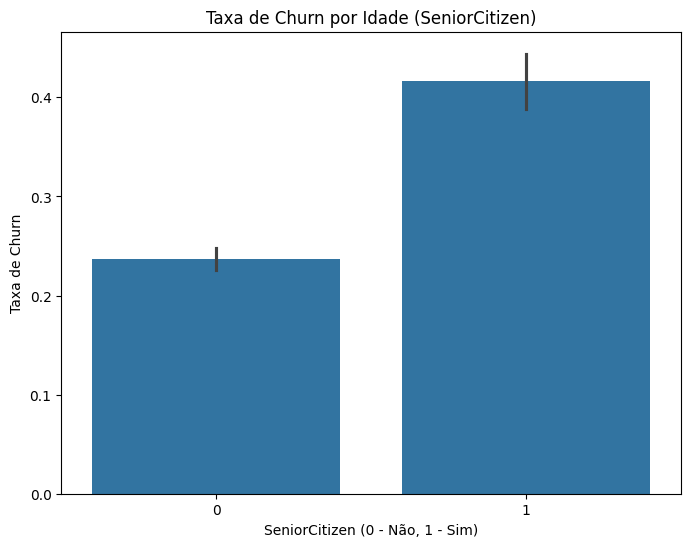

In [8]:
churn_by_age = df.groupby('SeniorCitizen')['Churn'].mean()
print('\nTaxa de Churn por Idade (SeniorCitizen):')
print(churn_by_age)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='SeniorCitizen', y='Churn')
plt.title('Taxa de Churn por Idade (SeniorCitizen)')
plt.xlabel('SeniorCitizen (0 - Não, 1 - Sim)')
plt.ylabel('Taxa de Churn')
plt.show()


# Análise das Taxas Mensais e Totais vs. Churn

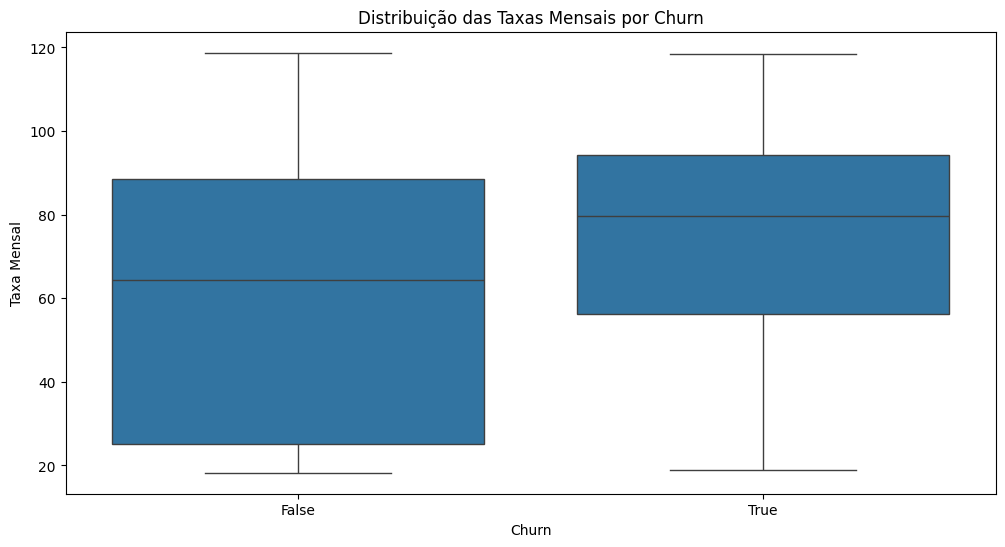


Média das Taxas Mensais por Churn:
Churn
False    61.307408
True     74.441332
Name: MonthlyCharges, dtype: float64


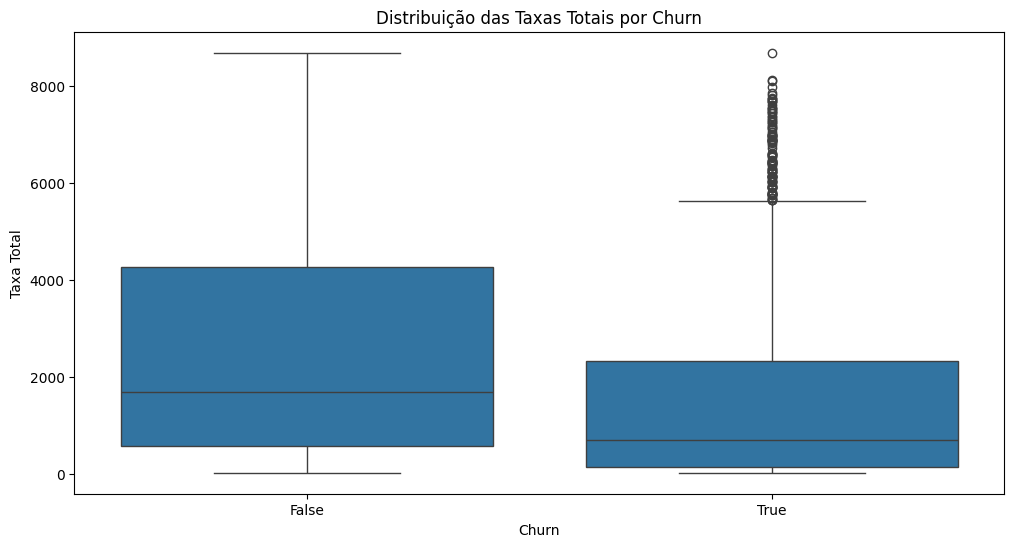


Média das Taxas Totais por Churn:
Churn
False    2555.344141
True     1531.796094
Name: TotalCharges, dtype: float64


In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Distribuição das Taxas Mensais por Churn')
plt.xlabel('Churn')
plt.ylabel('Taxa Mensal')
plt.show()

avg_MonthlyCharges_by_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print('\nMédia das Taxas Mensais por Churn:')
print(avg_MonthlyCharges_by_churn)


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Distribuição das Taxas Totais por Churn')
plt.xlabel('Churn')
plt.ylabel('Taxa Total')
plt.show()

avg_TotalCharges_by_churn = df.groupby('Churn')['TotalCharges'].mean()
print('\nMédia das Taxas Totais por Churn:')
print(avg_TotalCharges_by_churn)

# Correlações entre Características

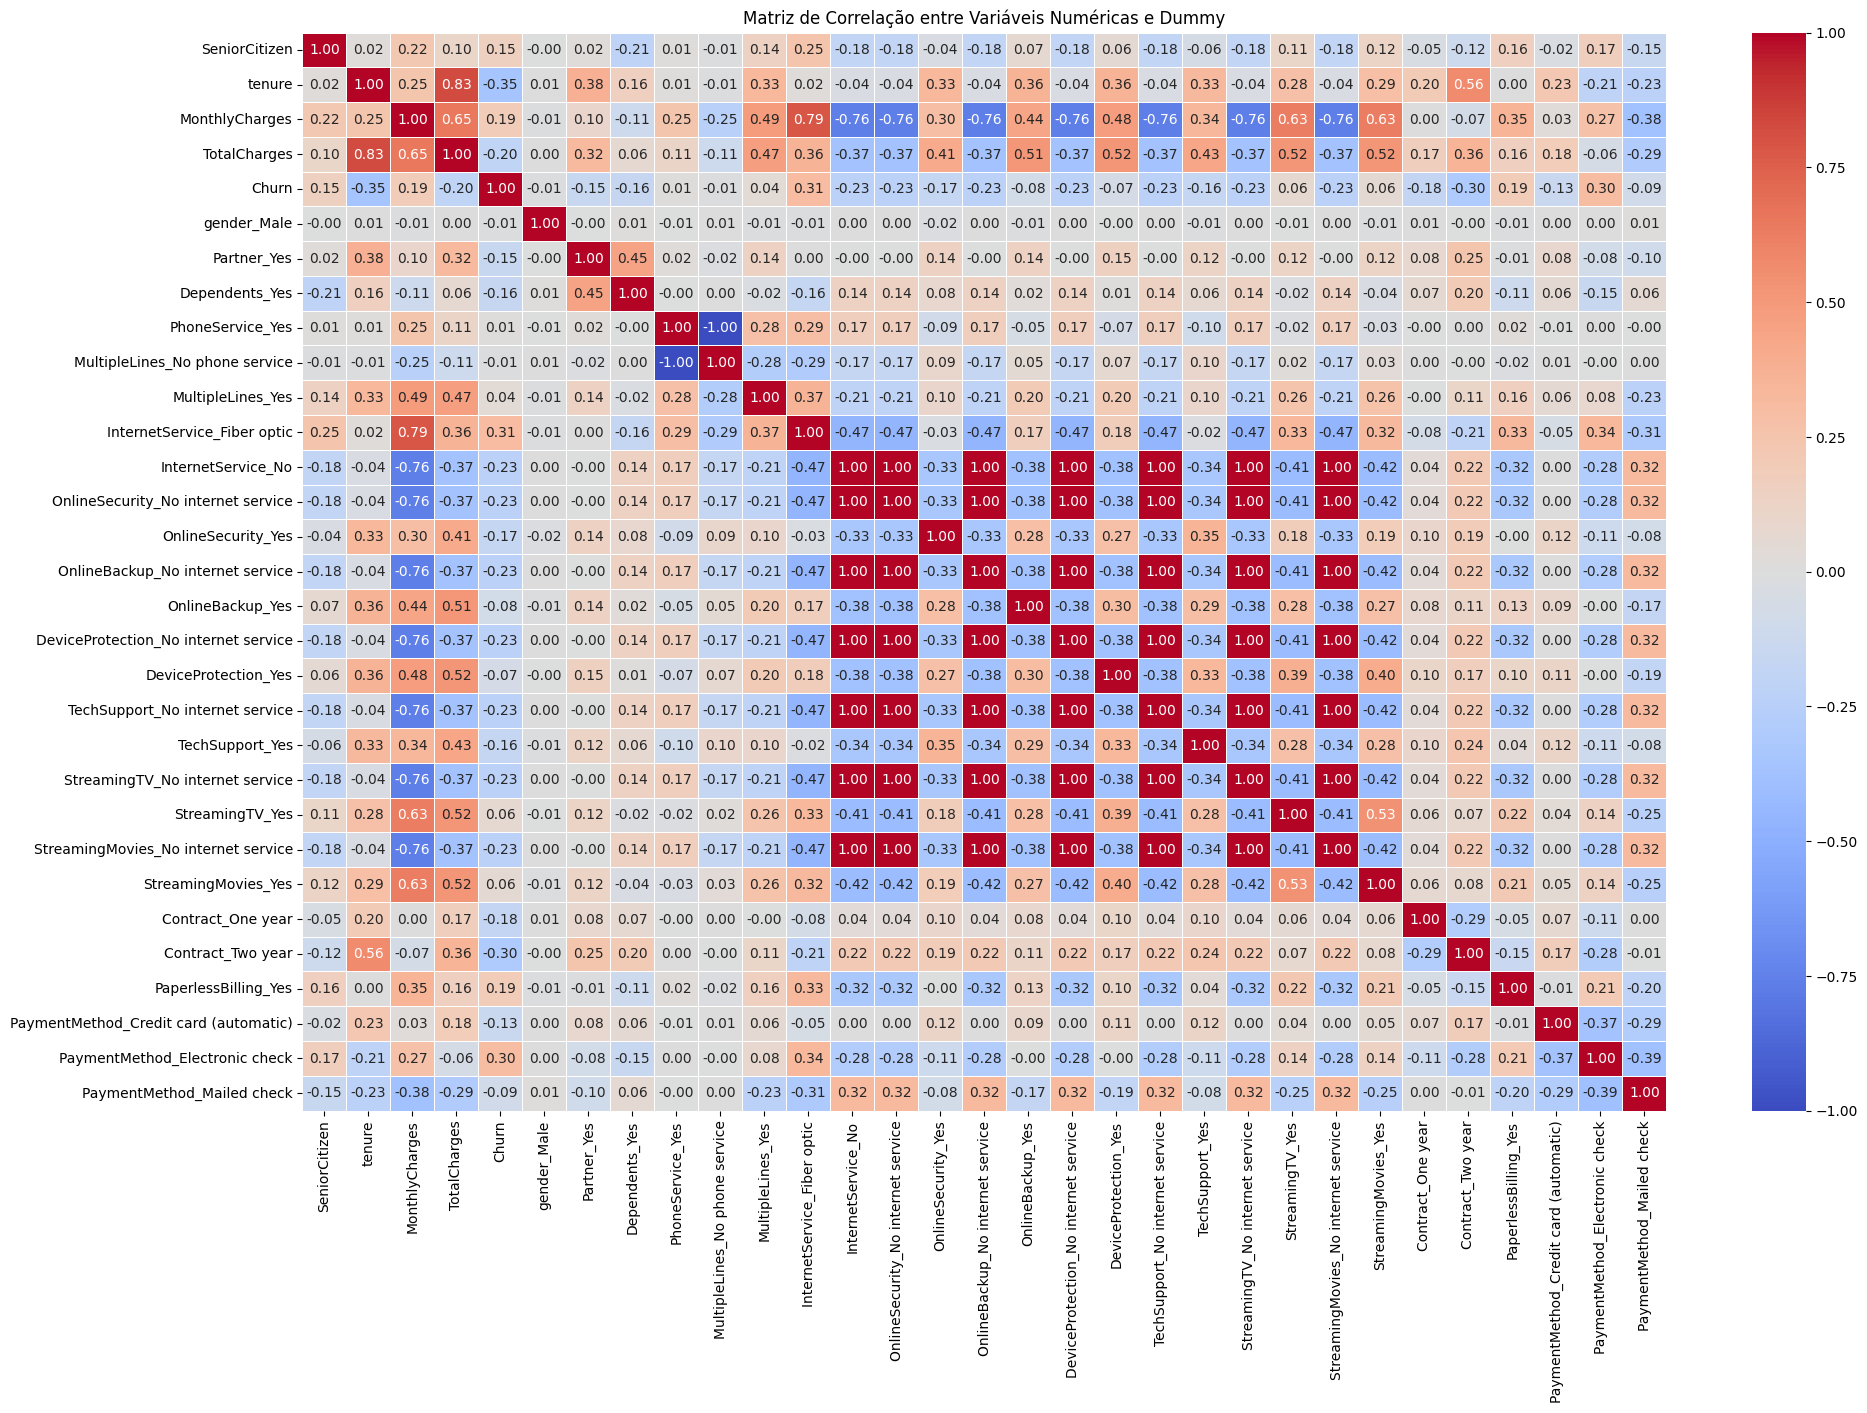

In [10]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df.drop(columns = 'customerID'), columns=categorical_columns, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(22, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas e Dummy')
plt.show()
